In [1]:
import sklearn
import pandas as pd
print( 'The scikit learn version is {}.'.format(sklearn.__version__))

df = pd.read_csv('Treasury Squeeze raw score data.csv')

The scikit learn version is 1.0.2.


In [2]:
df.head()

,rowindex,contract,price_crossing,price_distortion,roll_start,roll_heart,near_minus_next,ctd_last_first,ctd1_percent,delivery_cost,delivery_ratio,squeeze
0,1,TUZ92 Comdty,0.157659,0.900783,0.016053,1.000000,1.000000,0.902811,1.000000,0.010743,0.099313,True
1,2,TUH93 Comdty,0.018588,1.000000,1.000000,0.084724,0.778847,1.000000,0.136069,0.154116,1.000000,False
2,3,TUM93 Comdty,0.035755,0.045987,0.673543,1.000000,0.027689,0.067889,0.007696,0.034743,0.171676,False
3,4,TUU93 Comdty,0.663832,1.000000,0.063057,0.188899,0.064454,0.005742,0.166102,0.956668,1.000000,True
4,5,TUZ93 Comdty,0.109678,0.113601,0.726244,1.000000,1.000000,1.000000,1.000000,0.105467,0.145025,False


In [3]:
df.shape

(900, 12)

In [4]:
df = df.drop(['rowindex', 'contract'], axis=1)
df.replace({False: 0, True: 1}, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price_crossing    900 non-null    float64
 1   price_distortion  900 non-null    float64
 2   roll_start        900 non-null    float64
 3   roll_heart        900 non-null    float64
 4   near_minus_next   900 non-null    float64
 5   ctd_last_first    900 non-null    float64
 6   ctd1_percent      900 non-null    float64
 7   delivery_cost     900 non-null    float64
 8   delivery_ratio    900 non-null    float64
 9   squeeze           900 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 70.4 KB


In [6]:
df['squeeze'].value_counts()

0    516
1    384
Name: squeeze, dtype: int64

We observe that there are a good amount of data for both squeeze and not a squeeze.

In [7]:
y_temp = df['squeeze'].values
x = df.drop(['squeeze'], axis=1).values

In [8]:
# Splits data for train and test
from sklearn.model_selection import train_test_split

y = y_temp

# We can uncomment the different datapairs below try building a classification model
X = x[:, [0,1]] # 'price_crossing', 'price_distortion'
# X = x[:, [1,5]] # 'price_distortion', 'ctd_last_first'
# X = x[:, [7,8]] # 'delivery_cost', 'delivery_ratio'
# X = x[:, [4,6]] # 'near_minus_next', 'ctd1_person'


# Test set will be the 25% taken randomly
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=33)
print( X_train.shape, y_train.shape)

(675, 2) (675,)


In [9]:
# Standardize the features

from sklearn import preprocessing # helps to scale data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Text(0, 0.5, 'Price Distortion')

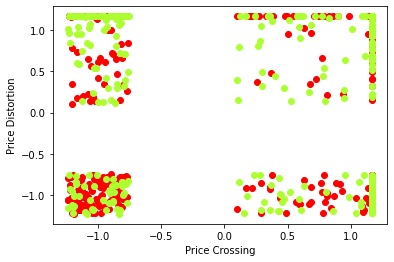

In [10]:
# Plot data

import matplotlib.pyplot as plt
import seaborn as sns
colors = ['red', 'greenyellow']

#it doesnt like "xrange" changed to "range"
for i in range(len(colors)):
    xs = X_train[:, 0][y_train == i]
    ys = X_train[:, 1][y_train == i]
    plt.scatter(xs, ys, c=colors[i])

plt.xlabel('Price Crossing')
plt.ylabel('Price Distortion')

This shows that the same plotting we did for the iris dataset doesnt work on the given treasury data.

I am not sure how the classifier will run work in this data.

Let's try plotting a histogram using the raw data.

In [11]:
#We take 3 columns of data and we split it to plot on histograms

df1=df.loc[df['squeeze'] == 1, 'price_crossing']
df2=df.loc[df['squeeze'] == 0, 'price_crossing']
df3=df.loc[df['squeeze'] == 1, 'price_distortion']
df4=df.loc[df['squeeze'] == 0, 'price_distortion']
df5=df.loc[df['squeeze'] == 1, 'delivery_ratio']
df6=df.loc[df['squeeze'] == 0, 'delivery_ratio']

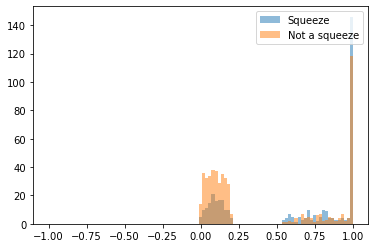

In [12]:
import numpy as np
import matplotlib
from matplotlib import pyplot

A = df5 # change the df pairs to see how the plots turn out
B = df6

bins = np.linspace(-1, 1, 100)

pyplot.hist(A, bins, alpha=0.5, label='Squeeze')
pyplot.hist(B, bins, alpha=0.5, label='Not a squeeze')
pyplot.legend(loc='upper right')
pyplot.show()

The histogram plots do not render any meaningful insight.

Lets build the classifier

In [13]:
#found a typo here... incorrect from book followed by corrected code
#from sklearn.linear_modelsklearn._model import SGDClassifier
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
clf.fit(X_train, y_train)

print( clf.coef_)
print( clf.intercept_)

[[ 0.76097181 -0.17672634]]
[0.33270558]


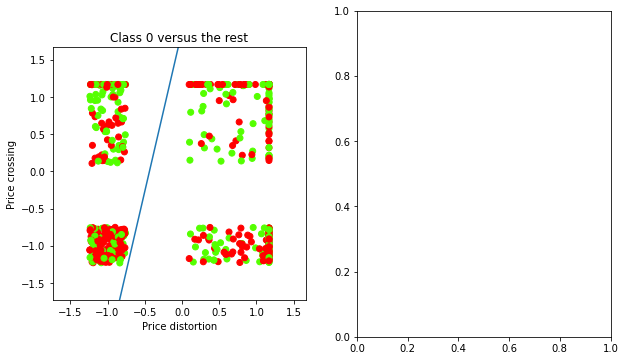

In [14]:
#don't forget to import Numpy as np here
import numpy as np

x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
#error in case Xs or xs
xs = np.arange(x_min, x_max, 0.5)
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(10, 6)
for i in [0]:
    axes[i].set_aspect('equal')
    axes[i].set_title('Class '+ str(i) + ' versus the rest')
    axes[i].set_xlabel('Price distortion')
    axes[i].set_ylabel('Price crossing')
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)
    
    #error here need plt.
    plt.sca(axes[i])
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.prism)
    ys = (-clf.intercept_[i] - xs * clf.coef_[i, 0]) / clf.coef_[i, 1]
    plt.plot(xs, ys)

Why do I get the above extra chart?
Need to do a bit more reading to understand

In [15]:
print( clf.predict(scaler.transform([[4.7, 3.1]])) )
#[0]

print( clf.decision_function(scaler.transform([[4.7, 3.1]])) )

[1]
[6.90596543]


In [16]:
from sklearn import metrics

y_train_pred = clf.predict(X_train)
print( metrics.accuracy_score(y_train, y_train_pred) )

y_pred = clf.predict(X_test)
print( metrics.accuracy_score(y_test, y_pred) )

print( metrics.classification_report(y_test, y_pred) )

print( metrics.confusion_matrix(y_test, y_pred) )

0.5392592592592592
0.52
              precision    recall  f1-score   support

           0       0.64      0.47      0.54       136
           1       0.42      0.60      0.50        89

    accuracy                           0.52       225
   macro avg       0.53      0.53      0.52       225
weighted avg       0.55      0.52      0.52       225

[[64 72]
 [36 53]]


We can conclude that all of the classifiers built using the different data pairs are very poor models. We cannot use them to classify and predict if there was a squeeze or not

In [17]:
print("My name is Hariharan Manickam")
print("My NetID is: hm32")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Hariharan Manickam
My NetID is: hm32
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
